In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data = pd.read_csv('/content/drive/My Drive/emotions.csv')

In [ ]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
data.shape

(2132, 2549)

In [ ]:
for col in data.columns:
    if(data[col].isnull().sum()>0):
        print(col)

# ***Visualization of the Dataset from fft_0_b to fft_749_b collums dataset EEG readings***

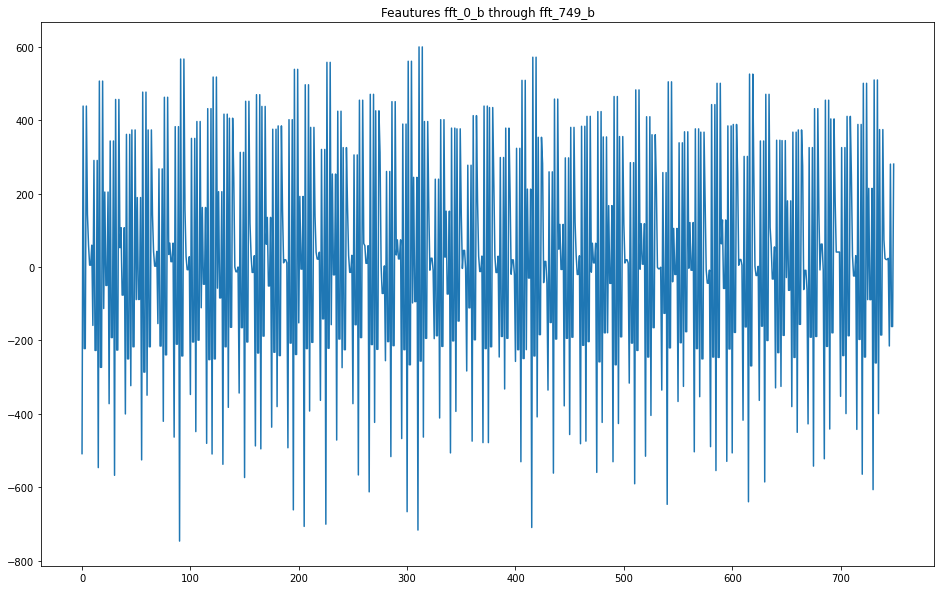

In [ ]:
# here we will se the data stats plotted
sample = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title('Feautures fft_0_b through fft_749_b')
plt.show()

In [ ]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [ ]:
def preprocess_inputs(df):
  df = df.copy()
    
  df['label'] = df['label'].replace(label_mapping)
    
  y = df['label'].copy()
  X = df.drop('label', axis=1).copy()
    
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


# ***METHOD-1 Training our Model using Regular Neural Network with 2 Hidden Layers and mesuring accuracy***

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 dense_3 (Dense)             (None, 64)                163136    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 1s 13ms/step - loss: nan - accuracy: 0.3529 - val_loss: nan - val_accuracy: 0.3311
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3420 - val_loss: nan - val_accuracy: 0.3311
Epoch 3/50
38/38 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3420 - val_loss: nan - val_accuracy: 0.3311
Epoch 4/50
38/38 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3420 - val_loss: nan - val_accuracy: 0.3311
Epoch 5/50
38/38 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3420 - val_loss: nan - val_accuracy: 0.3311


In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 31.406%


<BarContainer object of 4 artists>

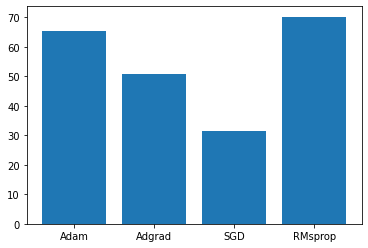

In [ ]:
plt.bar(['Adam','Adgrad','SGD','RMsprop'], [65.156, 50.652, 31.406, 70.156])

# **METHOD-2 Training our Model using Recurrent Neural Network and mesuring accuracy**

In [ ]:
# inputs = tf.keras.Input(shape=(X_train.shape[1],))

# expand_dims = tf.expand_dims(inputs, axis=2)
# gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
# flatten = tf.keras.layers.Flatten()(gru)
# outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# print(model.summary())

# ***How our RNN will work***

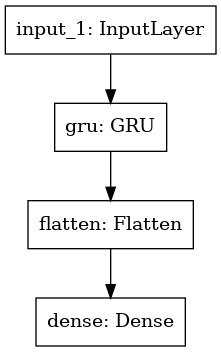

In [ ]:
# model.compile(
#     optimizer='SGD',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# history = model.fit(
#     X_train,
#     y_train,
#     validation_split=0.2,
#     batch_size=50,
#     epochs=150,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=5,
#             restore_best_weights=True
#         )
#     ]
# )

In [ ]:
# model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
# print("Test Accuracy: {:.3f}%".format(model_acc * 100))

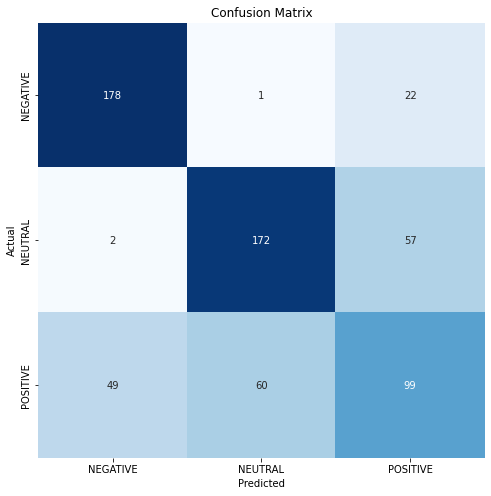

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.78      0.89      0.83       201
     NEUTRAL       0.74      0.74      0.74       231
    POSITIVE       0.56      0.48      0.51       208

    accuracy                           0.70       640
   macro avg       0.69      0.70      0.69       640
weighted avg       0.69      0.70      0.69       640



In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)